
🔹 Model Performance WITH Outliers:
✅ R-squared: 0.9070
✅ RMSE: 7623.33

🔹 Model Performance WITHOUT Outliers:
✅ R-squared: 0.9906
✅ RMSE: 1934.58

📊 Performance Comparison:
      Metric  With Outliers  Without Outliers
0  R-squared       0.907016          0.990644
1       RMSE    7623.326656       1934.577792


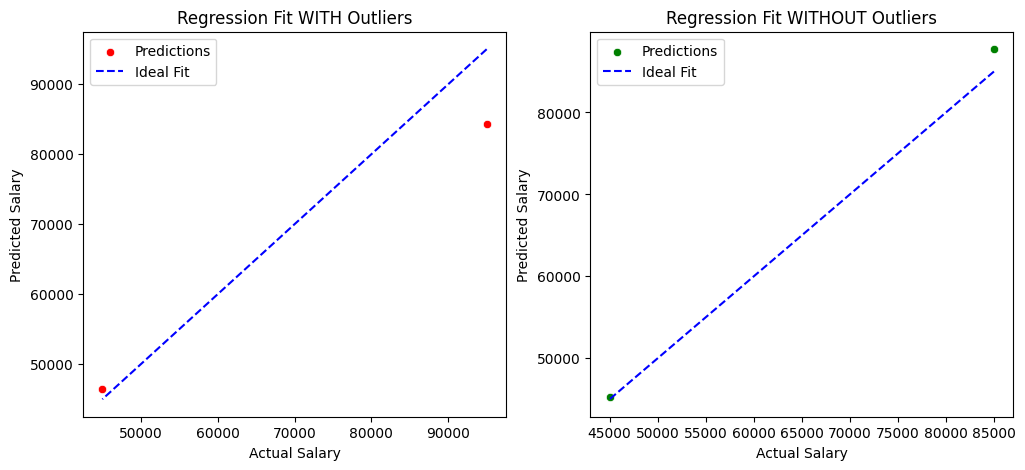

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Load Dataset with an Outlier
data = {
    "YearsExperience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 30],  # 30 is an outlier
    "EducationLevel": [12, 14, 16, 12, 16, 18, 14, 16, 18, 10],  
    "WorkHoursPerWeek": [35, 40, 45, 50, 55, 60, 50, 45, 40, 20],  
    "Salary": [40000, 45000, 50000, 60000, 65000, 70000, 80000, 85000, 95000, 200000]  # 200000 is an outlier
}

df = pd.DataFrame(data)


# Step 3: Define Features (X) and Target (y)
X = df[["YearsExperience", "EducationLevel", "WorkHoursPerWeek"]]
y = df["Salary"]

# Split into Training and Testing (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Model WITH Outliers
model_with_outliers = LinearRegression()
model_with_outliers.fit(X_train, y_train)
y_pred_with_outliers = model_with_outliers.predict(X_test)

# Evaluate Model WITH Outliers
r2_with_outliers = r2_score(y_test, y_pred_with_outliers)
rmse_with_outliers = np.sqrt(mean_squared_error(y_test, y_pred_with_outliers))

print("\n🔹 Model Performance WITH Outliers:")
print(f"✅ R-squared: {r2_with_outliers:.4f}")
print(f"✅ RMSE: {rmse_with_outliers:.2f}")

# Step 5: Remove Outliers using IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 6: Train Model WITHOUT Outliers
X_no_outliers = df_no_outliers[["YearsExperience", "EducationLevel", "WorkHoursPerWeek"]]
y_no_outliers = df_no_outliers["Salary"]

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

model_without_outliers = LinearRegression()
model_without_outliers.fit(X_train_no, y_train_no)
y_pred_without_outliers = model_without_outliers.predict(X_test_no)

# Evaluate Model WITHOUT Outliers
r2_without_outliers = r2_score(y_test_no, y_pred_without_outliers)
rmse_without_outliers = np.sqrt(mean_squared_error(y_test_no, y_pred_without_outliers))

print("\n🔹 Model Performance WITHOUT Outliers:")
print(f"✅ R-squared: {r2_without_outliers:.4f}")
print(f"✅ RMSE: {rmse_without_outliers:.2f}")

# Step 7: Compare Performance
performance_df = pd.DataFrame({
    "Metric": ["R-squared", "RMSE"],
    "With Outliers": [r2_with_outliers, rmse_with_outliers],
    "Without Outliers": [r2_without_outliers, rmse_without_outliers]
})

print("\n📊 Performance Comparison:")
print(performance_df)

# Step 8: Visualizing Regression Fit
plt.figure(figsize=(12,5))

# Plot WITH Outliers
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_with_outliers, color="red", label="Predictions")
plt.plot(y_test, y_test, color="blue", linestyle="dashed", label="Ideal Fit")
plt.title("Regression Fit WITH Outliers")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.legend()

# Plot WITHOUT Outliers
plt.subplot(1,2,2)
sns.scatterplot(x=y_test_no, y=y_pred_without_outliers, color="green", label="Predictions")
plt.plot(y_test_no, y_test_no, color="blue", linestyle="dashed", label="Ideal Fit")
plt.title("Regression Fit WITHOUT Outliers")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.legend()

plt.show()
